In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# To ignore warning messages
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset
df = pd.read_csv(r"D:\Fall 2020 courses\CSC5825 machine learning\homework\HW5\adult.csv", sep=',')
df.head()


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [3]:
# Knowing the total unique values in each featues
print ("\nUnique values :  \n",df.nunique())


Unique values :  
 age                  73
workclass             9
fnlwgt            21648
education            16
education.num        16
marital.status        7
occupation           15
relationship          6
race                  5
sex                   2
capital.gain        119
capital.loss         92
hours.per.week       94
native.country       42
income                2
dtype: int64


In [4]:
len(df) 

32561

Data Preprocessing and Data Cleaning

In [5]:
# checking for missing "?" values
df_missing = (df=='?').sum()
df_missing

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [6]:
# dropping the rows having missing values
df = df[df !='?']
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [7]:
df_missing = (df=='?').sum()
df_missing

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [8]:
# Dropping the feature 'fnlwgt' as it had 21648 total unique values
df = df.drop('fnlwgt',axis =1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   education       32561 non-null  object
 3   education.num   32561 non-null  int64 
 4   marital.status  32561 non-null  object
 5   occupation      30718 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital.gain    32561 non-null  int64 
 10  capital.loss    32561 non-null  int64 
 11  hours.per.week  32561 non-null  int64 
 12  native.country  31978 non-null  object
 13  income          32561 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


In [9]:
# encoding categorical variables using label Encoder
# select all categorical variables
from sklearn import preprocessing

df_categorical = df.select_dtypes(include=['object'])
df_categorical.head()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
0,NaN,HS-grad,Widowed,NaN,Not-in-family,White,Female,United-States,<=50K
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,United-States,<=50K
2,NaN,Some-college,Widowed,NaN,Unmarried,Black,Female,United-States,<=50K
3,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,United-States,<=50K
4,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,United-States,<=50K


In [10]:
df_categorical=df_categorical.fillna("")

In [11]:
# apply label encoder to df_categorical
le = preprocessing.LabelEncoder()
df_categorical = df_categorical.apply(le.fit_transform)
df_categorical.head()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
0,0,11,6,0,1,4,0,39,0
1,4,11,6,4,1,4,0,39,0
2,0,15,6,0,4,2,0,39,0
3,4,5,0,7,4,4,0,39,0
4,4,15,5,10,3,4,0,39,0


In [12]:
# Dropping earlier duplicate columns which had categorical values and concatinating the label encoded columns

df = df.drop(df_categorical.columns,axis=1)
df = pd.concat([df,df_categorical],axis=1)
df.head()

,age,education.num,capital.gain,capital.loss,hours.per.week,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
0,90,9,0,4356,40,0,11,6,0,1,4,0,39,0
1,82,9,0,4356,18,4,11,6,4,1,4,0,39,0
2,66,10,0,4356,40,0,15,6,0,4,2,0,39,0
3,54,4,0,3900,40,4,5,0,7,4,4,0,39,0
4,41,10,0,3900,40,4,15,5,10,3,4,0,39,0


In [13]:
# As 'hours.per.week' has 94 unique values. Redefining it to three unique values

df['hours.per.week'] = df['hours.per.week'].astype(int)
df.loc[df['hours.per.week'] < 40, 'hours.per.week'] = 0
df.loc[df['hours.per.week'] == 40, 'hours.per.week'] = 1
df.loc[df['hours.per.week'] > 40, 'hours.per.week'] = 2

In [14]:
# As 'age' has 73 unique values. Redefining it to three unique values

df['age'] = df['age'].astype(int)
df.loc[df['age'] <= 30, 'age'] = 0
df.loc[ (df['age'] > 30) & (df['age'] <= 60), 'age'] = 1
df.loc[df['age'] > 60, 'age'] = 2

In [15]:
# As 'capital.gain' has 119 unique values. Redefining it to five unique values

df['capital.gain'] = df['capital.gain'].astype(int)
df.loc[df['capital.gain'] <= 1000, 'capital.gain'] = 0
df.loc[ (df['capital.gain'] > 1000) & (df['capital.gain'] <= 2500), 'capital.gain'] = 1
df.loc[ (df['capital.gain'] > 2500) & (df['capital.gain'] <= 5000), 'capital.gain'] = 2
df.loc[ (df['capital.gain'] > 5000) & (df['capital.gain'] <= 10000), 'capital.gain'] =3
df.loc[df['capital.gain'] > 10000, 'capital.gain'] = 4

In [16]:
# As 'capital.loss' has 92 unique values. Redefining it to five unique values

df['capital.loss'] = df['capital.loss'].astype(int)
df.loc[df['capital.loss'] <= 1000, 'capital.loss'] = 0
df.loc[ (df['capital.loss'] > 1000) & (df['capital.loss'] <= 1500), 'capital.loss'] = 1
df.loc[ (df['capital.loss'] > 1500) & (df['capital.loss'] <= 2000), 'capital.loss'] = 2
df.loc[ (df['capital.loss'] > 2000) & (df['capital.loss'] <= 2500), 'capital.loss'] =3
df.loc[df['capital.loss'] > 2500, 'capital.loss'] = 4

In [17]:
df.head()

,age,education.num,capital.gain,capital.loss,hours.per.week,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
0,2,9,0,4,1,0,11,6,0,1,4,0,39,0
1,2,9,0,4,0,4,11,6,4,1,4,0,39,0
2,2,10,0,4,1,0,15,6,0,4,2,0,39,0
3,1,4,0,4,1,4,5,0,7,4,4,0,39,0
4,1,10,0,4,1,4,15,5,10,3,4,0,39,0


Applying Decision Tree

In [18]:
# Defining the calculate entropy function
def calculate_entropy(df_label):
    classes,class_counts = np.unique(df_label,return_counts = True)
    entropy_value = np.sum([(-class_counts[i]/np.sum(class_counts))*np.log2(class_counts[i]/np.sum(class_counts)) 
                        for i in range(len(classes))])
    return entropy_value

In [19]:
# Define the calculate information gain function
def weighted_feature_entropy(dataset,feature,label, threshold): 
    # Calculate the dataset entropy
    dataset_entropy = calculate_entropy(dataset[label])
    values,feat_counts= np.unique(dataset[feature],return_counts=True)
    # Calculate the weighted feature entropy                                # Call the calculate_entropy function
    weighted_feature_entropy = np.sum([(feat_counts[i]/np.sum(feat_counts))*calculate_entropy(dataset.where(dataset[feature]
                              ==values[i]).dropna()[label]) for i in range(len(values))])
    feature_info_gain = dataset_entropy - weighted_feature_entropy
    return weighted_feature_entropy

In [20]:
def create_decision_tree(data,originaldata,features,target_attribute_name,parent_node_class, threshold):  
  
    #If all target_values have the same value, return this value  
    if len(np.unique(data[target_attribute_name])) <= 1:  
        return np.unique(data[target_attribute_name])[0]  
      
    #If the dataset is empty, return the mode target feature value in the original dataset  
    elif len(data)==0:  
        return np.unique(originaldata[target_attribute_name])[np.argmax(np.unique(originaldata[target_attribute_name],return_counts=True)[1])]  
      
    
    elif len(features) ==0:  
        return parent_node_class
      
    else:          
        #Select the feature which best splits the dataset  
        item_values = [weighted_feature_entropy(data,feature,target_attribute_name, threshold) for feature in features] #Return the information gain values for the features in the dataset  
        
        #Set the default value for this node --> The mode target feature value of the current node
        parent_node_class = np.unique(data[target_attribute_name])[np.argmax(np.unique(data[target_attribute_name],return_counts=True)[1])]  

        best_feature_index = np.argmin(item_values)  
        best_feature = features[best_feature_index]
        
        #Create the tree structure. The root gets the name of the feature (best_feature) with the maximum information  
        #gain in the first run  
        tree = {best_feature:{}}  
        
        # create a set of nodes with entropy less than threshold and create leaf node for the same.
        my_list = set()
        for i, val in enumerate(item_values):
            if val < threshold:
                tree[best_feature][features[i]] = parent_node_class
                my_list.add(features[i])

        #Remove the feature with the best inforamtion gain and entropy above threshold from the feature space 
        features = [i for i in features if i != best_feature and i not in my_list]

        #Grow a branch under the root node for each possible value of the root node feature  
        for value in np.unique(data[best_feature]):  
            value = value  
            #Split the dataset along the value of the feature with the largest information gain and therwith create sub_datasets  
            sub_data = data.where(data[best_feature] == value).dropna()  
              
            subtree = create_decision_tree(sub_data,originaldata,features,target_attribute_name,parent_node_class, threshold)  
              
            #Add the sub tree, grown from the sub_dataset to the tree under the root node  
            tree[best_feature][value] = subtree  
              
        return(tree)      

In [21]:
def predict(query,tree,default = 1):    
    for key in list(query.keys()):  
        if key in list(tree.keys()):  
            
            try:  
                result = tree[key][query[key]]   
            except:  
                return default  
    
            result = tree[key][query[key]]  
            
            if isinstance(result,dict):  
                return predict(query,result)  
            else:  
                return result  

In [22]:
def calculate_error(data,tree):  
    #Create new query instances by removing the target feature column from the original dataset and   
    #convert it to a dictionary  
    queries = data.iloc[:,:-1].to_dict(orient = "records")  
      
    #Create a empty DataFrame in whose columns the prediction of the tree are stored  
    predicted = pd.DataFrame(columns=["predicted"])   
    data.reset_index(drop=True, inplace=True)
    #Calculate the prediction accuracy  
    for i in range(len(data)):  
        predicted.loc[i,"predicted"] = predict(queries[i],tree,1.0)
    accuracy = (np.sum(predicted["predicted"] == data["income"])/len(data))*100
    print('The prediction accuracy is: ',accuracy,'%')
    print('The error is: ',100 - accuracy ,'%')
    return 100 - accuracy

In [23]:
print ("\n Unique values :  \n",df.nunique())


 Unique values :  
 age                3
education.num     16
capital.gain       5
capital.loss       5
hours.per.week     3
workclass          9
education         16
marital.status     7
occupation        15
relationship       6
race               5
sex                2
native.country    42
income             2
dtype: int64


In [24]:
#Splitting Dataset (70:10:20)
train, validate, test = np.split(df.sample(frac=1, random_state=42), 
                       [int(.7*len(df)), int(.8*len(df))])

In [25]:
# Set the features and label
features = train.columns[:-1]
label = 'income'
parent=None
features

Index(['age', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week', 'workclass', 'education', 'marital.status',
       'occupation', 'relationship', 'race', 'sex', 'native.country'],
      dtype='object')

In [26]:
#Accuracy and error rate
cutoff_value = [0.2,0.4,0.6,0.8]
training_error = []
test_error = []
for i in cutoff_value:
    decision_tree = create_decision_tree(train,train,features,label,parent, i)
    print("decision tree for theshold :", i)
    print("Training")
    training_error.append(calculate_error(validate,decision_tree))
    print("Test")
    test_error.append(calculate_error(test,decision_tree))
    print("\n")

decision tree for theshold : 0.2
Training
The prediction accuracy is:  80.31326781326781 %
The error is:  19.686732186732186 %
Test
The prediction accuracy is:  81.34500230308613 %
The error is:  18.654997696913867 %


decision tree for theshold : 0.4
Training
The prediction accuracy is:  81.94103194103194 %
The error is:  18.058968058968063 %
Test
The prediction accuracy is:  82.61937663135268 %
The error is:  17.38062336864732 %


decision tree for theshold : 0.6
Training
The prediction accuracy is:  82.18673218673219 %
The error is:  17.813267813267814 %
Test
The prediction accuracy is:  83.1260555811454 %
The error is:  16.873944418854606 %


decision tree for theshold : 0.8
Training
The prediction accuracy is:  76.01351351351352 %
The error is:  23.986486486486484 %
Test
The prediction accuracy is:  76.32427452786735 %
The error is:  23.675725472132655 %




In [27]:
print(cutoff_value)
print(training_error)
print(test_error)

[0.2, 0.4, 0.6, 0.8]
[19.686732186732186, 18.058968058968063, 17.813267813267814, 23.986486486486484]
[18.654997696913867, 17.38062336864732, 16.873944418854606, 23.675725472132655]


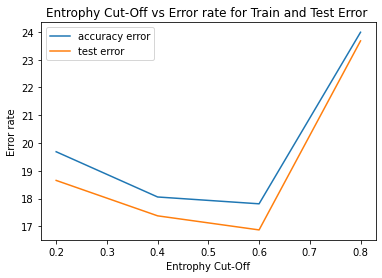

In [28]:
# plotting the line 1 points 
plt.plot(cutoff_value, training_error, label = "accuracy error")
# plotting the line 2 points 
plt.plot(cutoff_value, test_error, label = "test error")
plt.xlabel('Entrophy Cut-Off')
# Set the y axis label of the current axis.
plt.ylabel('Error rate')
# Set a title of the current axes.
plt.title('Entrophy Cut-Off vs Error rate for Train and Test Error ')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

CONCLUSION: 

From the above results, it can be concluded that the highest accuracy of 83.12% has been achieved for Cut-off value '0.6' with error rate of 16.87%.
Feature 'fnlwgt' from dataset has been dropped as the total unique value was high(21648) which is not suitable for classifier.
The Plot depicts Entrophy Cut-Off vs Error Rate for training error and test error.